<a href="https://colab.research.google.com/github/fares37665/optimisation_tp/blob/master/lineaire_regression(PCA%2CLasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sc

# Question1

In [0]:
#QUESTION1
data = pd.read_csv ('datadm3.csv',header=None)
M=np.asmatrix(data)
#print(data.head(1))

#print(df)
M.shape



(442, 211)

# nombre de variable exploratoire=210
#nombre d'observation= 442

# Question2

In [0]:
#Question2
N=M[:,0:210]
Y=M[:,210]
#I=np.ones((442,1))
#mean_vect=np.transpose(M)*I
mean_vect=np.mean(M,axis=0)
#mean_vect=mean_vect.flatten()

mean_X=mean_vect[0:210]
mean_Y=mean_vect[0,210]
print('les variables exploratoires sont centrés car la moyenne tend vers 0 \n',mean_X,'\n')
print('*******************************************')
print('output variable non centré',mean_Y)

les variables exploratoires sont centrés car la moyenne tend vers 0 
 [[ 2.00945344e-17  4.01890688e-18  0.00000000e+00 -2.00945344e-18
  -2.00945344e-18 -4.01890688e-18  1.10519939e-17  0.00000000e+00
  -8.03781375e-18 -1.60756275e-17  2.41134413e-17  0.00000000e+00
  -3.41607085e-17  1.60756275e-17 -4.01890688e-18 -1.20567206e-17
  -8.03781375e-18  1.60756275e-17  3.61701619e-17 -2.61228947e-17
  -4.01890688e-17  1.60756275e-17  1.60756275e-17 -1.60756275e-17
   1.80850809e-17 -1.00472672e-17 -1.60756275e-17 -3.01418016e-17
  -1.70803542e-17  1.60756275e-17  8.03781375e-18  1.60756275e-17
  -2.00945344e-18  1.80850809e-17 -7.23403238e-17 -8.03781375e-18
  -1.20567206e-17 -2.00945344e-17  8.03781375e-18  2.41134413e-17
  -1.60756275e-17 -1.20567206e-17  5.02363360e-18 -8.03781375e-18
   0.00000000e+00 -8.03781375e-18 -9.04254047e-18  1.40661741e-17
  -2.21039878e-17  2.00945344e-18 -1.70803542e-17  2.00945344e-17
  -1.00472672e-18  1.60756275e-17 -2.00945344e-18  1.60756275e-17
   1.4

In [0]:

print('les variable  sont normalisé =',N.var())
print('la resultat n est pas normalisé car =',Y.var())
# les variables et output ne sont pas normalisé
result_vect=np.zeros((210,1))
for i in range(210):
    result_vect[i,0]=N[:,i].var()
print(result_vect)

les variable  sont normalisé = 1.0
la resultat n est pas normalisé car = 5929.884896910383
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1

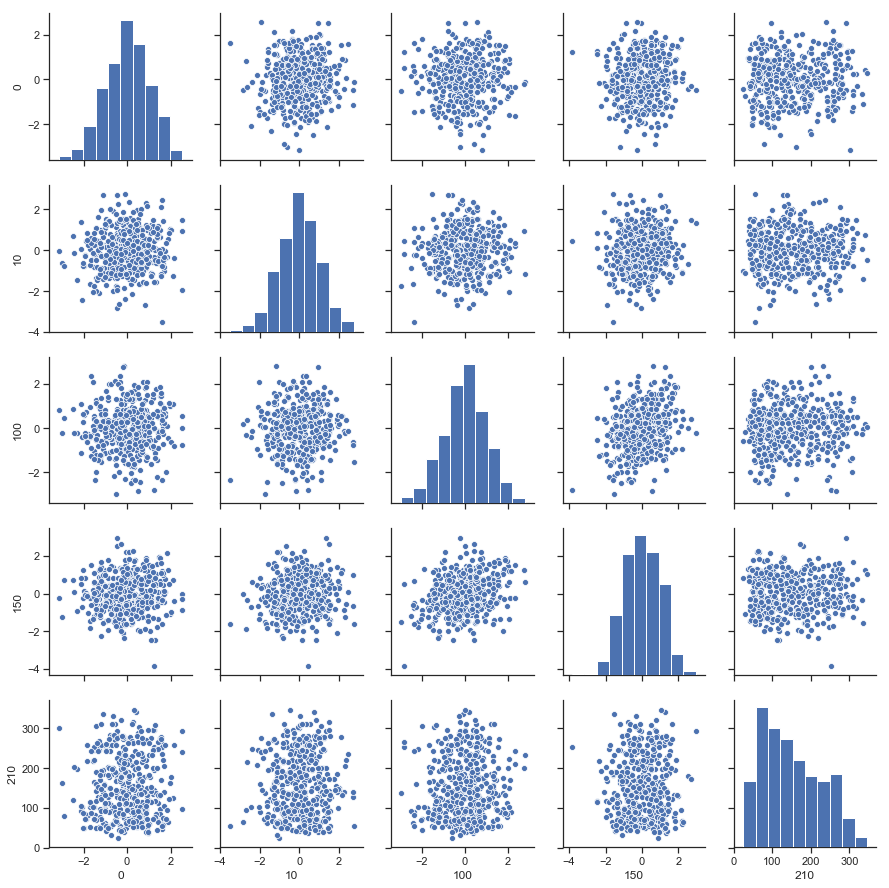

In [0]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
df = pd.read_csv('datadm3.csv', usecols = [0,10,100,150,210],header=None)
#df=np.asmatrix(df)
sns.pairplot(df)
#on constate que les variables sont ondependant il n ya pas une relation lineaire entre les variables

# Question3

In [0]:
#Question3
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(N, Y, test_size=0.2)
print ('taille de x_train=',X_train.shape,'taille de y_train=', y_train.shape)
print('taille de x_test=',X_test.shape,'taille de y_test=', y_test.shape)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
#print(predictions)
print('slope=',lm.coef_)
print('intercept=',lm.intercept_)


taille de x_train= (353, 210) taille de y_train= (353, 1)
taille de x_test= (89, 210) taille de y_test= (89, 1)
slope= [[-9.22590562e+13  2.74570499e+14 -6.84344777e+14 -8.77919851e+14
  -3.71313881e+15  1.56356451e+15 -4.67245482e+14 -4.03342212e+14
   5.21136045e+14 -2.48109579e+14  3.00553096e+15 -1.53709571e+14
  -9.87921534e+14  1.36938244e+15  1.19104647e+15 -1.73779475e+15
   1.77071864e+14 -9.71523852e+14 -3.68793338e+15 -7.51393800e+14
  -4.30316232e+14 -1.30107780e+14  2.13094810e+14  6.93750000e+00
   5.72150814e+14 -1.65778329e+13  4.00403304e+15  7.70383517e+14
   2.34131247e+15 -1.67337024e+15 -1.49279433e+15 -2.35352655e+15
   1.22392307e+14 -4.02022821e+15  1.30000000e+01 -2.31632817e+15
   1.35506117e+15 -4.90773006e+15  2.76361868e+15  3.54019553e+15
   1.94656912e+14  6.11867071e+14 -1.00318322e+15 -2.19396620e+15
  -8.97824047e+14 -6.66406001e+14 -1.95692984e+15 -3.54878592e+13
  -4.55091330e+14  2.41122878e+14  9.80260476e+14 -9.96634813e+14
   3.39679651e+15  1.85

# Question4

la matrice de covariance= 
 [[ 1.03282102 -0.18095887 -0.04978879 ... -0.00425157  0.15137409
  -0.0420709 ]
 [-0.18095887  1.01370111  0.14252699 ... -0.14049088 -0.09699683
   0.08107684]
 [-0.04978879  0.14252699  1.01897185 ... -0.3404125   0.01920902
  -0.15841835]
 ...
 [-0.00425157 -0.14049088 -0.3404125  ...  0.98747691 -0.09670486
   0.33156702]
 [ 0.15137409 -0.09699683  0.01920902 ... -0.09670486  0.97055034
   0.0615684 ]
 [-0.0420709   0.08107684 -0.15841835 ...  0.33156702  0.0615684
   1.00409315]] 
 de dimension= (210, 210)
les valeur propre de matrice= 
 [ 5.59415749e+00  5.21188174e+00  5.16790083e+00  5.10587775e+00
  5.05758766e+00  4.98479962e+00  4.92547632e+00  4.90630897e+00
  4.84151669e+00  4.82951236e+00  4.70818457e+00  4.67949184e+00
  4.65962972e+00  4.63178324e+00  4.60688467e+00  4.55980665e+00
  4.48156923e+00  4.44459727e+00  4.43652846e+00  4.37062059e+00
  4.31116618e+00  4.26746336e+00  4.23908090e+00  4.19846801e+00
  4.12672703e+00  4.09818602e+00

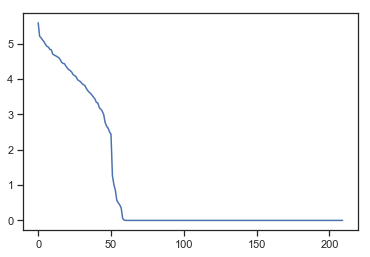

In [0]:
#Question4
#1 ere methode
from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(X_train)
cc=cov.covariance_
print('la matrice de covariance=','\n', cc,'\n','de dimension=',np.shape(cc))
lambda_vect,v=np.linalg.eigh(cc)
lambda_sort=np.sort(lambda_vect)
lambda_sort=lambda_sort[::-1]
print('les valeur propre de matrice=','\n',lambda_sort)
plt.plot(lambda_sort)

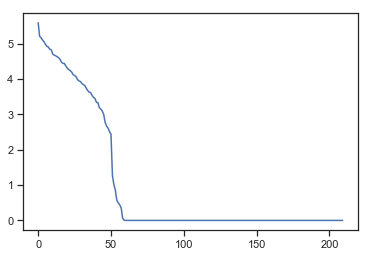

In [0]:
#2 éme methode
n_xtrain=X_train.shape
n_xtrain=n_xtrain[0]
P=np.dot(X_train.T,X_train)*(1/n_xtrain)
U,S,V=np.linalg.svd(P)
plt.plot(S)

Apres les 60 premiere PCA, on constate que le reste des valeurs propre sont quasiment null donc les variables associé ne donnent pas une information significatif 

# Question5

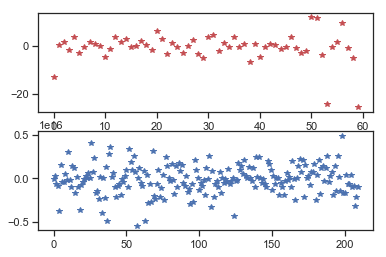

In [0]:
#Question5
Xt=np.dot(X_train,U[:,:60])
Xtst=np.dot(X_test,U[:,:60])

lm1 = linear_model.LinearRegression()
model1 = lm1.fit(Xt, y_train)
predictions1 = lm1.predict(Xtst)
#print(predictions)
#print('slope=',lm1.coef_)
#print('intercept=',lm1.intercept_)
ax1=plt.subplot(2, 1, 1)
plt.plot(lm1.coef_.flatten(),'*r')
ax2=plt.subplot(2, 1, 2)
plt.plot(lm.coef_.flatten(),'*b')


# Question 6

In [0]:
print(lm.intercept_)
print(lm1.intercept_)
y_train.mean()

[150.41129603]
[151.46103097]


154.22379603399435

les intercept ne sont pas egaux mais il sont proches.
Donc le fait d'utiliser juste les 60  variables les plus importante donne presque le meme resultat.


In [0]:
mm=np.mean(Xt,axis=0)
Xtc=Xt-mm
res=Xtc/(Xt.var())*0.5

lm2 = linear_model.LinearRegression()
model2 = lm2.fit(res, y_train)
print(lm2.intercept_)
print(y_train.mean())




[154.22379603]
154.22379603399435


# Question7


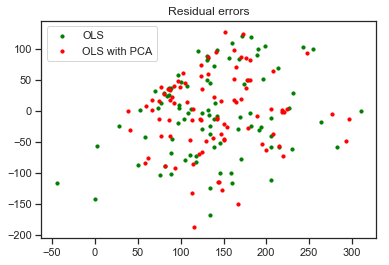

In [0]:
plt.scatter(np.ravel(lm.predict(X_test)),np.ravel(lm.predict(X_test) - y_test) ,color = "green", s = 10, label = 'OLS')
plt.scatter(np.ravel(lm1.predict(Xtst)),np.ravel( lm1.predict(Xtst) - y_test), 
            color = "red", s = 10, label = 'OLS avec PCA') 
plt.title("Residual errors") 
plt.legend() 

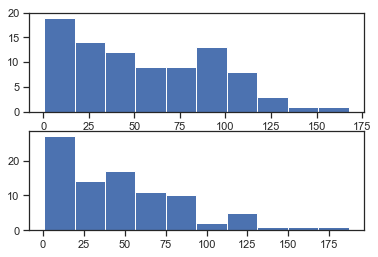

In [0]:
Resid =  abs(lm.predict(X_test) - y_test)
ResidPCA = abs(lm1.predict(Xtst) - y_test)
plt.subplot(2,1,1)
plt.hist(Resid)
plt.subplot(2,1,2)
plt.hist(ResidPCA)
plt.show()

In [0]:
deter1=lm.score(X_test, y_test)
deter2=lm1.score(Xtst, y_test)
print("The determination coefficient for the test sample without PCA:", deter1)
print("The determination coefficient for the test sample with PCA:", deter2)


The determination coefficient for the test sample without PCA: 0.2650715887301881
The determination coefficient for the test sample with PCA: 0.3913484460858211


In [0]:
print('mean_squared_error sans PCA: ', mean_squared_error(y_test,lm.predict(X_test)))
print('mean_squared_error avec PCA: ', mean_squared_error(y_test,lm1.predict(Xtst)))

mean_squared_error sans PCA:  4617.759978492217
mean_squared_error avec PCA:  3824.3272996560536


# Question8

In [0]:
MM = np.column_stack((np.ones((X_train.shape[0], 1 )), X_train)) 

p = MM.shape[1]
n = MM.shape[0]

test = np.zeros((p,p))
pval_mem = np.zeros(p)
pval = np.zeros((p,p))
resids = y_train

var_sel = []
var_remain = list(range(p))
in_test = []

regr = LinearRegression(fit_intercept = False)

for k in range(p): 
    resids_mem = np.zeros((p,n))

    for i in var_remain:
        xtmp = MM [:,[i]]
        regr.fit(xtmp , resids)
        
    
        xx = np.sum( np.asarray(MM [:,[i]]) ** 2 )    
        resids_mem [i,:] = (regr.predict(xtmp) - resids).ravel()
        sigma2_tmp = np.sum (resids_mem [i,:] ** 2) / xx
        test[k,i] = np.sqrt(n) * np.abs(regr.coef_) / (np.sqrt( sigma2_tmp )) 
        pval[k,i] =   2 * (1 - sc.norm.cdf(test[k,i]))
        
    
    best_var = np.argmax(test[k,:])
    var_sel.append(best_var)
    resids = resids_mem[best_var,:]
    pval_mem [k] = pval[k,best_var]
    var_remain = np.setdiff1d(var_remain,var_sel)
        
print("Selected variables (In order of selection): " , np.array(var_sel))

Selected variables (In order of selection):  [  0  59 124  86 118 168  48 134 194 153  31  78  67  35  58 173 203 136
 206  83 107   4 184  82 130 126 175  32  34  60 141 186 183 157 193   5
  63 200 197 205 178  55  57 209  69  17  91  18  80 116 102 137 100 115
 202  24 171  45 119 121  40 142  85 125  50 158  76  13  92   7 154 208
 160  12  73  79  72 167 199   6  77  70  97 112 155 105 164 169 165 129
  38 182 148 117  87  68 156 170  27 103   3 172  88 139 151 145  93 161
 191 150 111  23 198   2  14  44  41 146  84 123  54 192  75 110   9  47
   8  39  33  74   1  36 147  21 210  56 190 114 177  65 101  19  66  53
 128 143 174 201  81 135  49 113  89 179  28 159  71 133  64  30 163 166
  26  25 188 138  51 131 187 106  15  42  61 149  11  46 127 176  94 122
 109 120  98 108 104 185  95 189  10 204 144  52 152 181  37  16 140  96
  99 207  90  22  29 195 180 162 132  43  62 196  20]


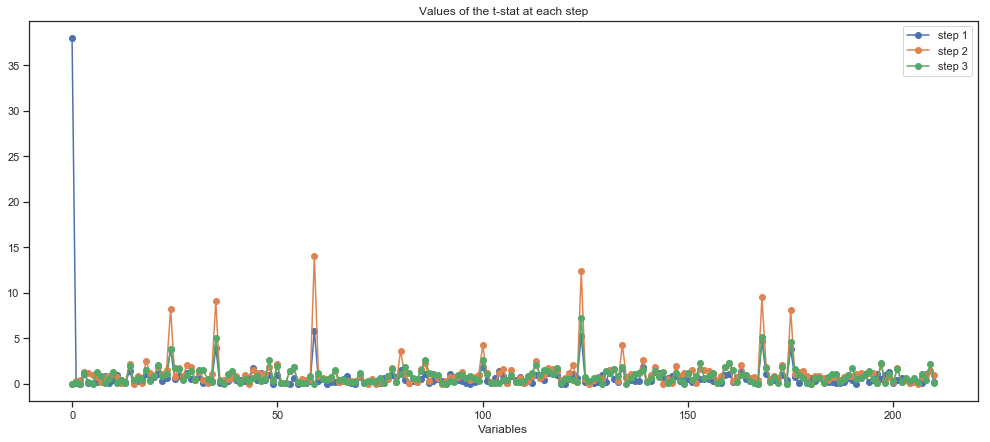

In [0]:
fig = plt.figure()
fig.set_size_inches(17, 7, forward=True)
for k in range(3): 
    plt.plot(np.arange(p),test[k,:], '-o',label = "step {}".format(k+1))
plt.legend(loc=1)
plt.title("Values of the t-stat at each step")
plt.xlabel("Variables")
plt.show()

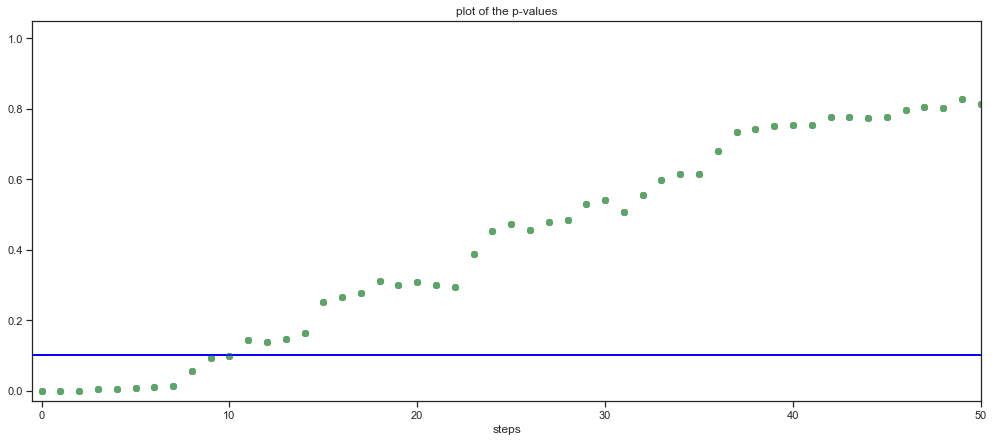

In [0]:
fig2 = plt.figure() 
fig2.set_size_inches(17, 7, forward=True)
for k in range(3): 
    plt.plot(np.arange(p),pval_mem, 'o')
    plt.plot([-0.5,50],[.1,.1],color = "blue" )
    plt.axis(xmin = -.5,xmax = 50,ymin = -.03)
plt.title("plot of the p-values")
plt.xlabel("steps")
plt.show()

In [0]:
print("variables sélectionnées (dans l'ordre): ", np.array(var_sel)[pval_mem<.1])

variables sélectionnées (dans l'ordre):  [  0  59 124  86 118 168  48 134 194 153  31]


In [0]:
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
results = sm.OLS(y_train, X_train).fit()
aa=results.summary()
pval=results.pvalues
tval=results.tvalues


# Question10

In [0]:
sel = np.array(var_sel)[pval_mem<.1]
k = np.count_nonzero(sel)
sel = sel[1:]
X_learn_forward = MM[:,sel]

regr = LinearRegression().fit(X_learn_forward, resids)

X_test = np.array(X_test)
pred_forward = regr.predict(X_test [:,sel])
risk_forward = mean_squared_error(pred_forward, y_test)/n
print('The risk of the forward selection: ', risk_forward)

The risk of the forward selection:  74.85256410290066


# Question 11 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

kf = KFold(4, True, 1)
# We need to convert Xtrain and Ytrain from dataframe to array in order to apply KFold
Xtrain_array = np.array(X_train)
Ytrain_array = np.array(y_train)
kfolds = np.array(list(kf.split(Xtrain_array)))

#  Question 12

In [0]:
lambdas = 10**np.linspace(-5,3,500)
p = Xtrain_array.shape[1]
_risk = []
for lmbd in lambdas:
    local_risk = 0
    ridge = Ridge(alpha = lmbd)
    for i in range(4):
        train, test = kfolds[i,:]
        XF_train = Xtrain_array[train]
        YF_train = Ytrain_array[train]
        XF_test = Xtrain_array[test]
        YF_test = Ytrain_array[test]
        n = YF_test.shape[0]
        ridge.fit(XF_train, YF_train)
        Ypred_fold = ridge.predict(XF_test)
        local_risk = local_risk + ((YF_test - Ypred_fold).var() + (YF_test - Ypred_fold).mean() **2) /n
    _risk.append(local_risk/4)

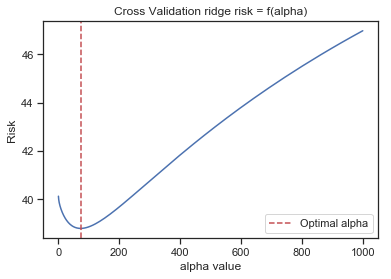

In [0]:
plt.figure()    
plt.plot(lambdas, _risk)
plt.xlabel('alpha value')
plt.ylabel('Risk')
plt.title('Cross Validation ridge risk = f(alpha)')
plt.axvline(x = lambdas[np.argmin(_risk)], color = 'r', linestyle = '--', label = 'Optimal alpha')
plt.legend()
plt.show()

# Question 13 

C:\Users\revecom\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CV estimated alpha is 6.666305118048417


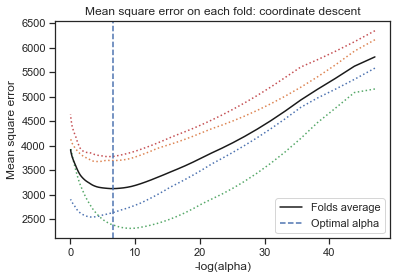

In [0]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv = 4).fit(X_train, y_train)
plt.figure()
plt.plot(model.alphas_, model.mse_path_, ':')
plt.plot(model.alphas_, model.mse_path_.mean(axis = -1), 'k', label = 'Folds average')
plt.axvline(model.alpha_, linestyle = '--', label = 'Optimal alpha')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
print('The CV estimated alpha is', model.alpha_)

In [0]:
from sklearn.linear_model import  Lasso, LassoCV
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 4, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print('The minimum risk that corresponds to alpha ', mean_squared_error(y_test, lasso.predict(X_test))/n)

C:\Users\revecom\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The minimum risk that corresponds to alpha  41.96786325469943


#  Question 14

The number of selected variables by the LASSO is 7
The selected variables by the LASSO are (array([ 58,  85, 112, 123, 159, 167, 174], dtype=int64),)


Text(0, 0.5, 'Regression coefficient')

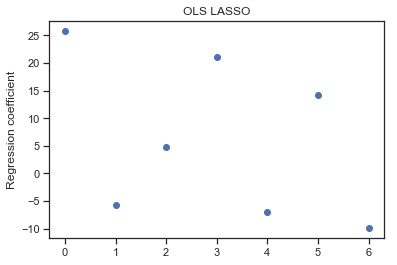

In [0]:
print('The number of selected variables by the LASSO is', np.size(lasso.coef_.nonzero()))
print('The selected variables by the LASSO are', lasso.coef_.nonzero())
Xtrain_lasso = X_train[:,lasso.coef_.nonzero()[0]]
regLASSO = LinearRegression(fit_intercept=True).fit(Xtrain_lasso, y_train)
plt.scatter(range(np.size(lasso.coef_.nonzero())), regLASSO.coef_)
plt.title("OLS LASSO")
plt.ylabel("Regression coefficient")

#  Question 15

In [0]:
from sklearn.preprocessing import PolynomialFeatures
#As a non-linear model, we will use the polynomial model
pf = PolynomialFeatures(degree = 3)
Xtrain_transformed = pf.fit_transform(Xtrain_lasso)
Xtest_transformed = pf.fit_transform(X_test[:,lasso.coef_.nonzero()[0]])
Poly = LinearRegression().fit(Xtrain_transformed, y_train)
YPoly_pred = Poly.predict(Xtest_transformed)
risk_polynomial = (1/y_test.shape[0]) * np.linalg.norm(YPoly_pred - y_test)**2
print("As a non-linear model, we will use the polynomial model of degree 3\nThe estimated risk of this model: ", risk_polynomial)

As a non-linear model, we will use the polynomial model of degree 3
The estimated risk of this model:  5531.736173268554
